# Exercice Clustering

Dans cet exercice, nous allons utiliser l'algorithme K-means pour classer les fleurs du dataset Iris.  Nous avons deja utilisé ce dataset lorsque nous avons etudié la classification (dans le cadre de l'apprentissage supervisé).

On commence par importer le dataset et en étudier la description. 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Ce dataset possède des features et une colonne target, qui indique l'espère de l'iris correspondant. Nous affichons ci-dessous le nom des features et le nom des targets (même si la colonne target ne sera pas utilisée pour la construction des clusters).


In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


On crée un nouveau DataFrame comprenant les données iris et on ajoute une colonne 'species' qui indique l'espèce d'Iris. Cette colonne ne sera utilisée que pour comprendre les résultats obtenus mais en aucun cas pour construire le modèle puisqu'on est dans de l'apprentissage non supervisé.

In [3]:
import pandas as pnd
iris_df = pnd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Comme le tableau inclut plusieurs *features*, nous pouvons les visualiser par paires avec matplotlib. Ici dans l'exemple, on voit les colonnes "petal length" et "sepal width".

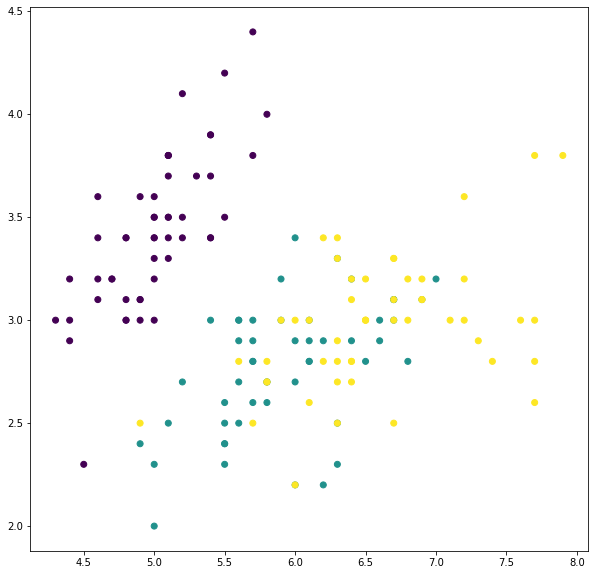

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,10])

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])


Cependant, il y a beaucoup de combinaisons possibles. On peut afficher toute la matrice de combinaisons avec `scatter_matrix`

[]

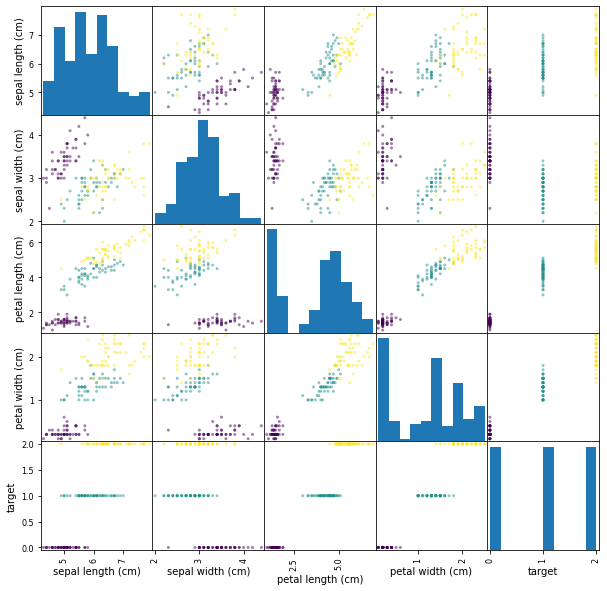

In [6]:
pnd.plotting.scatter_matrix(iris_df, figsize=(10,10), c=iris.target)
plt.plot()

Une autre librairie fournit un affichage un peu différent :

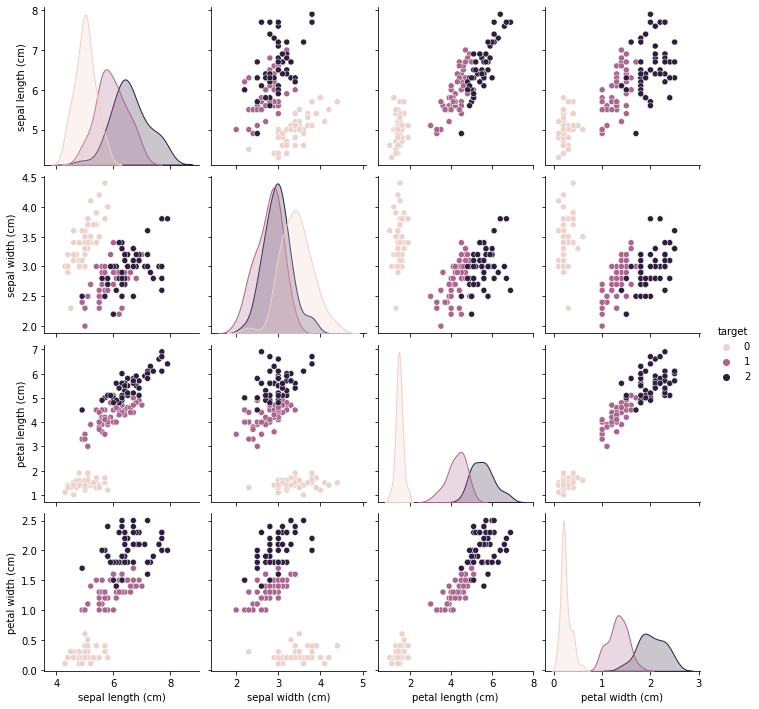

In [7]:
import seaborn as sns
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],
     hue='target')

## Création du modèle

Maintenant qu'on a le DataFrame avec les données, on peut créer notre modèle K-Means. 

On choisit le nombre de clusters égal à 3 et on calcule le modèle sur le dataframe auquel on a supprimé la colonne target car elle n'est pas utilisée lors de l'apprentissage non supervisé.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=11)
kmeans.fit( iris_df.drop(['target'], axis='columns') )

KMeans(n_clusters=3, random_state=11)

In [9]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


On peut observer que certains "0" et "2" sont melangés (alors que les fleurs sont ordonnées par espèce). 

Affichons les espèces qui étaient indiquées par la colonne 'target' :

In [10]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


On peut également comparer visuellement les labels obtenus par k-means et les valeurs de 'target'.

Nous affichons d'abord les points colorés selon des labels identifiés par le modèle :

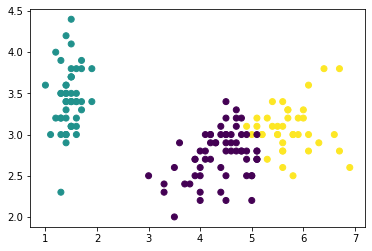

In [11]:
plt.scatter(iris_df['petal length (cm)'], iris_df['sepal width (cm)'], c=kmeans.labels_)
plt.show()

Pour comparer, nous affichons maintenant les couleurs correspondant aux labels originaux (non fournis lors de l'entraînement) :

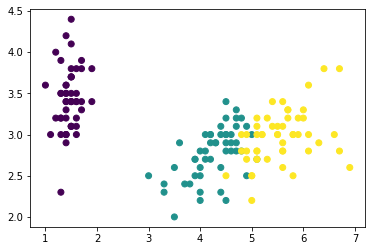

In [12]:
plt.scatter(iris_df['petal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'])
plt.show()